# 7. Hypothesis Testing

## 7.1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

## 7.2. Import data

In [2]:
data = pd.read_csv('cleaned.csv')

In [3]:
data.shape

(15000, 16)

In [4]:
num_columns = data.select_dtypes(include = 'number').columns
cat_columns = data.select_dtypes(exclude = 'number').columns

In [5]:
print('numeric columns', num_columns)
print('categorical columns',cat_columns)

numeric columns Index(['student_id', 'age', 'study_hours', 'attendance_percentage',
       'math_score', 'science_score', 'english_score', 'overall_score'],
      dtype='object')
categorical columns Index(['gender', 'school_type', 'parent_education', 'internet_access',
       'travel_time', 'extra_activities', 'study_method', 'final_grade'],
      dtype='object')


## 7.3. Data normality check
##### (normal + linear) or (non-normal+monotonic)

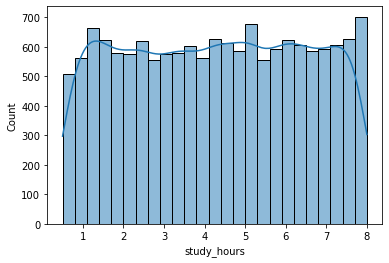

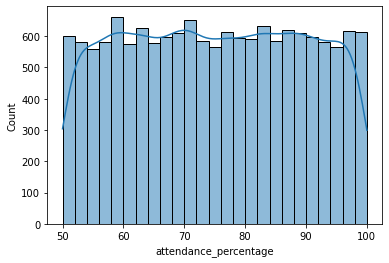

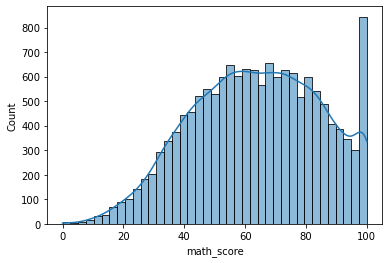

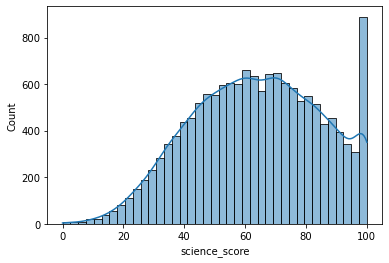

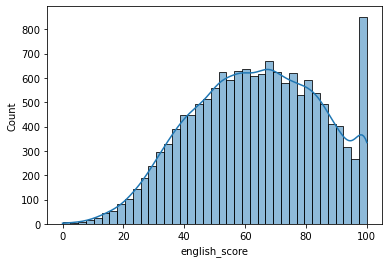

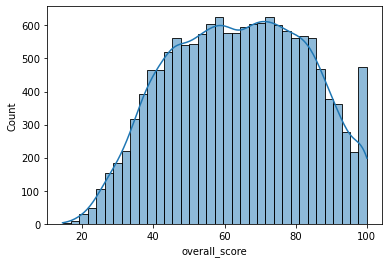

In [6]:
for i in ['study_hours', 'attendance_percentage',
       'math_score', 'science_score', 'english_score', 'overall_score']:
    plt.figure(figsize = (6,4))
    sns.histplot(data[i], kde = True)
    plt.show()

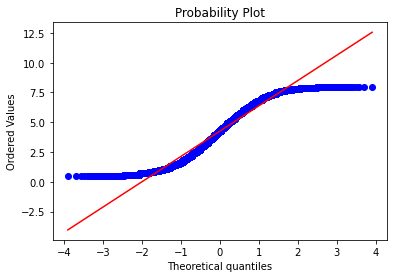

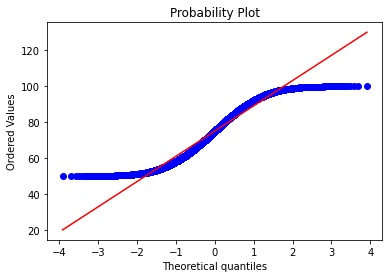

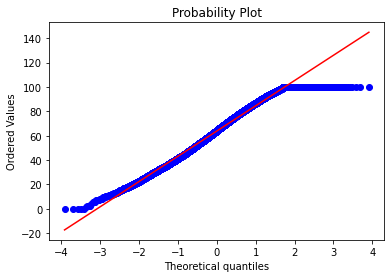

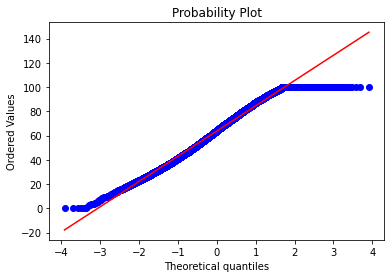

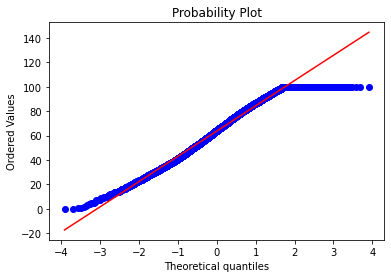

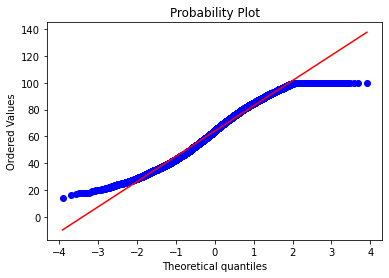

In [7]:
import scipy.stats as stats

for i in ['study_hours', 'attendance_percentage',
       'math_score', 'science_score', 'english_score', 'overall_score']:
    plt.figure(figsize = (6,4))
    stats.probplot(data[i], plot=plt)
    plt.show()



Histogram: Shows the overall shape of the data distribution. A roughly bell-shaped and symmetric histogram suggests approximate normality, while skewness, multiple peaks, sharp cutoffs, or piling up at boundaries indicate non-normality.

KDE (Kernel Density Estimate): Smooths the histogram to highlight the underlying distribution pattern. A single smooth peak with symmetric tails supports approximate normality; asymmetry, long tails, or flat/irregular shapes signal deviation from normality.

Q–Q Plot: Compares data quantiles to theoretical normal quantiles. Points closely following the straight reference line indicate normality; systematic curves, S-shapes, or tail deviations confirm non-normality even when histograms look acceptable.



Visual inspection using histograms and Q–Q plots indicates that the numeric variables are not strictly normally distributed, primarily due to bounded score ranges and ceiling effects.
However, the distributions are approximately symmetric and the sample size is large (n ≈ 15,000), allowing the use of parametric tests under the Central Limit Theorem.
Non-parametric alternatives are also considered to validate robustness of result

## 7.3. Numeric Vs Numeric

Numric columns = 'age', 'study_hours', 'attendance_percentage',
       'math_score', 'science_score', 'english_score', 'overall_score'

### 7.3.1. Pearson correlation

In [8]:
numeric_data = data.select_dtypes(include='number')
pearson_corr = numeric_data.corr(method='pearson')

pearson_corr

,student_id,age,study_hours,attendance_percentage,math_score,science_score,english_score,overall_score
student_id,1.000000,-0.001124,0.005129,0.003860,-0.001781,0.003156,0.004628,-0.000468
age,-0.001124,1.000000,0.004240,0.004521,0.000575,0.008525,0.002694,0.004981
study_hours,0.005129,0.004240,1.000000,-0.009486,0.802971,0.804551,0.804208,0.905885
attendance_percentage,0.003860,0.004521,-0.009486,1.000000,0.252210,0.248960,0.253859,0.288473
math_score,-0.001781,0.000575,0.802971,0.252210,1.000000,0.785904,0.788176,0.885394
science_score,0.003156,0.008525,0.804551,0.248960,0.785904,1.000000,0.785256,0.886058
english_score,0.004628,0.002694,0.804208,0.253859,0.788176,0.785256,1.000000,0.884869
overall_score,-0.000468,0.004981,0.905885,0.288473,0.885394,0.886058,0.884869,1.000000


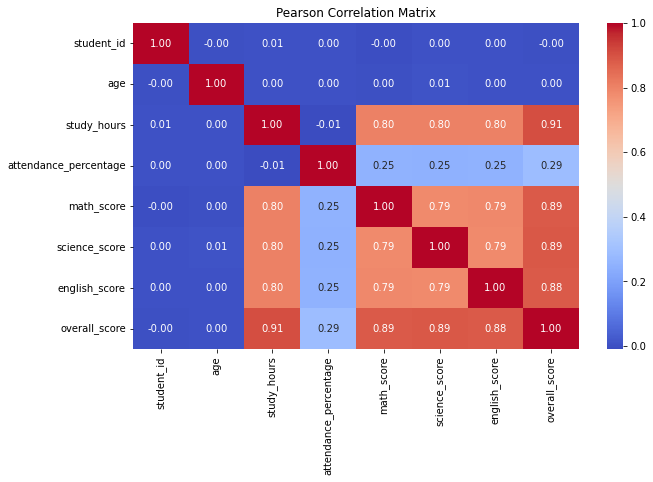

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.show()

The correlation matrix highlights clear distinctions between variables that meaningfully relate to academic performance and those that do not. Identifiers such as student_id show near-zero correlation with all variables, confirming that they carry no analytical signal and should not be interpreted as explanatory factors.


Study hours show a strong positive relationship with subject scores in Mathematics, Science, and English, with correlations consistently around 0.80. The relationship with overall score is even stronger (≈0.91), indicating that study time is the single most influential numeric variable in explaining performance. This suggests that consistent study effort directly aligns with better outcomes across all subjects rather than being subject-specific.

Attendance percentage demonstrates a moderate positive correlation with subject scores (≈0.25) and overall score (≈0.29). While attendance is clearly associated with performance, its effect is weaker than that of study hours. This implies that attendance is a necessary but not sufficient condition for high performance; presence alone matters less than how effectively time is used for studying.

Strong correlations among subject scores themselves (≈0.78–0.79) indicate that academic performance is internally consistent across subjects. Students who perform well in one subject tend to perform well in others, suggesting a general academic proficiency rather than isolated subject strengths. This consistency is reflected in the very high correlations between each subject score and the overall score (≈0.88–0.89).

Overall, the numeric relationships reinforce a central conclusion: performance is primarily driven by behavioral factors, particularly study effort, with attendance playing a supporting role. Demographic attributes such as age do not meaningfully explain performance differences, and academic outcomes appear to reflect a general level of student engagement and consistency rather than subject-specific or background-driven effects.

## 7.4. Numerical Vs Binary

### 7.4.1. One sample t test

Assumptions

1) students are expected to study 4 hours

2) minimum passing marks are 60

3) minimum attendance required is 75 percent

#### 7.4.1.1. Hypothesis Set 1: Study Hours vs Expected Standard

H₀:
Mean study hours of students = 4 hours

H₁:
Mean study hours of students ≠ 4 hours

In [10]:
from scipy.stats import ttest_1samp


t_stat, p_value = ttest_1samp(data['study_hours'], popmean = 4)

print('The t stat value is', t_stat)
print('The p value is', p_value)

if p_value < 0.05:
    print('reject null Hypothesis')
else:
    print('failed to reject null hypothesis')
    

The t stat value is 14.621796594599637
The p value is 4.368654451384816e-48
reject null Hypothesis


Hence there is no siginificant data to tell that Mean study hours of students is 4 hours

#### 7.4.1.2. Hypothesis Set 2: Attendance vs Institutional Expectation

H₀:
Mean attendance percentage = 75%

H₁:
Mean attendance percentage ≠ 75%

In [11]:
from scipy.stats import ttest_1samp


t_stat, p_value = ttest_1samp(data['attendance_percentage'], popmean = 75)

print('The t stat value is', t_stat)
print('The p value is', p_value)

if p_value < 0.05:
    print('reject null Hypothesis')
else:
    print('failed to reject null hypothesis')
    

The t stat value is -0.07007707931517075
The p value is 0.9441332441250797
failed to reject null hypothesis


Hence, Mean attendance percentage is 75%

#### 7.4.1.3. Hypothesis Set 3: Performance vs Passing Threshold

H₀:
Mean overall score = 60

H₁:
Mean overall score ≠ 60

In [12]:
from scipy.stats import ttest_1samp


t_stat, p_value = ttest_1samp(data['overall_score'], popmean = 60)

print('The t stat value is', t_stat)
print('The p value is', p_value)

if p_value < 0.05:
    print('reject null Hypothesis')
else:
    print('failed to reject null hypothesis')
    

The t stat value is 25.914279720152244
The p value is 6.954821340661337e-145
reject null Hypothesis


Hence there is no siginificant data to tell that  Mean overall score = 60

### 7.4.2. Independent 2 sample t tests

#### 7.4.2.1. Hypothesis Set 4: Internet Access vs Performance

H₀:
Mean overall score (internet = Yes) = Mean overall score (internet = No)

H₁:
Mean overall score (internet = Yes) ≠ Mean overall score (internet = No)

In [13]:
from scipy.stats import ttest_ind

group1 = data[data['internet_access'] == 'yes']['overall_score']
group2 = data[data['internet_access'] == 'no']['overall_score']

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print('reject null Hypothesis')
else:
    print('failed to reject null hypothesis')
    

t-statistic: 0.4251836897126626
p-value: 0.6707327604319626
failed to reject null hypothesis


Hence, Mean overall score (internet = Yes) = Mean overall score (internet = No)

#### 7.4.2.2. Hypothesis Set 5: Extra Activities vs Study Hours

H₀:
Mean study hours (extra activities = Yes) = Mean study hours (extra activities = No)

H₁:
Mean study hours (extra activities = Yes) ≠ Mean study hours (extra activities = No)

In [14]:
from scipy.stats import ttest_ind

group1 = data[data['extra_activities'] == 'yes']['study_hours']
group2 = data[data['extra_activities'] == 'no']['study_hours']

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print('reject null Hypothesis')
else:
    print('failed to reject null hypothesis')
    

t-statistic: 1.0054269086481595
p-value: 0.31470754878302526
failed to reject null hypothesis


Hence, Mean study hours (extra activities = Yes) = Mean study hours (extra activities = No)

#### 7.4.2.3. Hypothesis Set 6: School Type vs Academic Performance

H₀:
Mean overall score (Private) = Mean overall score (Public)

H₁:
Mean overall score (Private) ≠ Mean overall score (Public)

In [15]:
from scipy.stats import ttest_ind

group1 = data[data['school_type'] == 'private']['overall_score']
group2 = data[data['school_type'] == 'public']['overall_score']

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print('reject null Hypothesis')
else:
    print('failed to reject null hypothesis')
    

t-statistic: nan
p-value: nan
failed to reject null hypothesis


Hence, Mean overall score (Private) = Mean overall score (Public)

#### 7.4.2.4. Hypothesis Set 7: Gender (Binary subset) vs Performance

H₀:
Mean overall score (Male) = Mean overall score (Female)

H₁:
Mean overall score (Male) ≠ Mean overall score (Female)

In [16]:
from scipy.stats import ttest_ind

group1 = data[data['gender'] == 'Male']['overall_score']
group2 = data[data['gender'] == 'Female']['overall_score']

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print('reject null Hypothesis')
else:
    print('failed to reject null hypothesis')
    

t-statistic: -1.0471583048021513
p-value: 0.29505199478428434
failed to reject null hypothesis


Hence, Mean overall score (Male) = Mean overall score (Female)

## 7.5. Numerical Vs Categorical => 3

Numeric: overall_score, study_hours, attendance_percentage

Categorical (3+):

study_method (6 groups)

parent_education (6 groups)

final_grade (6 groups)

age (6 groups)

travel_time (4 groups)

### 7.5.1. One Way ANOVA tests

#### 7.5.1.1. Hypothesis Set 1: Study Method vs Overall Score

H₀:
Mean overall score is the same across all study methods.

H₁:
At least one study method has a different mean overall score.

In [17]:
data['study_method'].unique()

array(['Notes', 'Textbook', 'Group study', 'Coaching', 'Mixed',
       'Online videos'], dtype=object)

In [18]:
from scipy.stats import f_oneway

group_1 = data[data['study_method'] == 'Notes']['overall_score']
group_2 = data[data['study_method'] == 'Textbook']['overall_score']
group_3 = data[data['study_method'] == 'Group study']['overall_score']
group_4 = data[data['study_method'] == 'Coaching']['overall_score']
group_5 = data[data['study_method'] == 'Mixed']['overall_score']
group_6 = data[data['study_method'] == 'Online videos']['overall_score']



f_statistic, p_value = f_oneway(group_1, group_2, group_3, group_4, group_5, group_6)

print("t-statistic:", t_stat)
print("p-value:", p_value)


if p_value < 0.05:
    print('reject null Hypothesis')
else:
    print('failed to reject null hypothesis')


t-statistic: -1.0471583048021513
p-value: 0.08155475641109781
failed to reject null hypothesis


Hence, Mean overall score is the same across all study methods.

#### 7.5.1.2. Hypothesis Set 2: Parent Education vs Overall Score

H₀:
Mean overall score is equal across all parental education levels.

H₁:
At least one parental education level differs in mean score.

In [19]:
data['parent_education'].unique()

array(['Post graduate', 'Graduate', 'High school', 'No formal', 'Diploma',
       'Phd'], dtype=object)

In [20]:
from scipy.stats import f_oneway

group_1 = data[data['parent_education'] == 'Post graduate']['overall_score']
group_2 = data[data['parent_education'] == 'Graduate']['overall_score']
group_3 = data[data['parent_education'] == 'High School']['overall_score']
group_4 = data[data['parent_education'] == 'No formal']['overall_score']
group_5 = data[data['parent_education'] == 'Diploma']['overall_score']
group_6 = data[data['parent_education'] == 'Phd']['overall_score']



f_statistic, p_value = f_oneway(group_1, group_2, group_3, group_4, group_5, group_6)

print("t-statistic:", t_stat)
print("p-value:", p_value)


if p_value < 0.05:
    print('reject null Hypothesis')
else:
    print('failed to reject null hypothesis')


t-statistic: -1.0471583048021513
p-value: nan
failed to reject null hypothesis


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3621: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


Hence, Mean overall score is equal across all parental education levels.

#### 7.5.1.3. Hypothesis Set 3: Age vs Overall Score

H₀:
Mean overall score is equal across all age groups.

H₁:
At least one age group differs in mean score.

In [21]:
data['age'].unique()

array([14, 18, 17, 16, 19, 15], dtype=int64)

In [22]:
from scipy.stats import f_oneway

group_1 = data[data['age'] == 14]['overall_score']
group_2 = data[data['age'] == 15]['overall_score']
group_3 = data[data['age'] == 16]['overall_score']
group_4 = data[data['age'] == 17]['overall_score']
group_5 = data[data['age'] == 18]['overall_score']
group_6 = data[data['age'] == 19]['overall_score']



f_statistic, p_value = f_oneway(group_1, group_2, group_3, group_4, group_5, group_6)

print("t-statistic:", t_stat)
print("p-value:", p_value)


if p_value < 0.05:
    print('reject null Hypothesis')
else:
    print('failed to reject null hypothesis')


t-statistic: -1.0471583048021513
p-value: 0.23597402689243457
failed to reject null hypothesis


Hence, Mean overall score is equal across all age groups.

#### 7.5.1.4.  Hypothesis Set 4: Travel Time vs Overall Score

H₀:
Mean overall score is equal across all travel time categories.

H₁:
At least one travel time group differs in mean score.

In [23]:
data['travel_time'].unique()

array(['<15 min', '>60 min', '15-30 min', '30-60 min'], dtype=object)

In [24]:
from scipy.stats import f_oneway

group_1 = data[data['travel_time'] == '<15 min']['overall_score']
group_2 = data[data['travel_time'] == '>60 min']['overall_score']
group_3 = data[data['travel_time'] == '15-30 min']['overall_score']
group_4 = data[data['travel_time'] == '30-60 min']['overall_score']



f_statistic, p_value = f_oneway(group_1, group_2, group_3, group_4)

print("t-statistic:", t_stat)
print("p-value:", p_value)


if p_value < 0.05:
    print('reject null Hypothesis')
else:
    print('failed to reject null hypothesis')


t-statistic: -1.0471583048021513
p-value: 0.37096141676893846
failed to reject null hypothesis


Hence, Mean overall score is equal across all travel time categories.

#### 7.5.1.5. Hypothesis Set 5: Study Method vs Study Hours

H₀:
Mean study hours are equal across all study methods.

H₁:
At least one study method differs in mean study hours.

In [25]:
data['study_method'].unique()

array(['Notes', 'Textbook', 'Group study', 'Coaching', 'Mixed',
       'Online videos'], dtype=object)

In [26]:
from scipy.stats import f_oneway

group_1 = data[data['study_method'] == 'Notes']['study_hours']
group_2 = data[data['study_method'] == 'Textbook']['study_hours']
group_3 = data[data['study_method'] == 'Group study']['study_hours']
group_4 = data[data['study_method'] == 'Coaching']['study_hours']
group_5 = data[data['study_method'] == 'Mixed']['study_hours']
group_6 = data[data['study_method'] == 'Online videos']['study_hours']



f_statistic, p_value = f_oneway(group_1, group_2, group_3, group_4, group_5, group_6)

print("t-statistic:", t_stat)
print("p-value:", p_value)


if p_value < 0.05:
    print('reject null Hypothesis')
else:
    print('failed to reject null hypothesis')


t-statistic: -1.0471583048021513
p-value: 0.3261745817580177
failed to reject null hypothesis


Hence, Mean study hours are equal across all study methods.

#### 7.5.1.6. Hypothesis Set 6: Final Grade vs Attendance

H₀:
Mean attendance is equal across all final grades.

H₁:
At least one grade has a different mean attendance.

In [27]:
data['final_grade'].unique()

array(['E', 'D', 'B', 'F', 'C', 'A'], dtype=object)

In [28]:
from scipy.stats import f_oneway

group_1 = data[data['final_grade'] == 'A']['attendance_percentage']
group_2 = data[data['final_grade'] == 'B']['attendance_percentage']
group_3 = data[data['final_grade'] == 'C']['attendance_percentage']
group_4 = data[data['final_grade'] == 'D']['attendance_percentage']
group_5 = data[data['final_grade'] == 'E']['attendance_percentage']
group_6 = data[data['final_grade'] == 'F']['attendance_percentage']



f_statistic, p_value = f_oneway(group_1, group_2, group_3, group_4, group_5, group_6)

print("t-statistic:", t_stat)
print("p-value:", p_value)


if p_value < 0.05:
    print('reject null Hypothesis')
else:
    print('failed to reject null hypothesis')


t-statistic: -1.0471583048021513
p-value: 0.0
reject null Hypothesis


Hence there is no significant data to validate that Mean attendance is equal across all final grades.

## 7.6. categorical vs Categorical

### 7.6.1. Hypothesis Set 1: Gender × Final Grade

H₀:
Gender and final grade are independent.

H₁:
Gender and final grade are associated.

In [29]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['gender'], data['final_grade'])

contingency_table

final_grade,A,B,C,D,E,F
gender,,,,,,
Female,253,542,1273,1236,1084,591
Male,217,552,1231,1249,1137,593
Other,251,544,1193,1285,1157,612


In [30]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print('reject null Hypothesis')
else:
    print('failed to reject null hypothesis')


Chi-square statistic: 9.5810
Degrees of freedom: 10
P-value: 0.477992
failed to reject null hypothesis


Hence, Gender and final grade are independent.

#### 7.6.1.1. Size Effect : Cramers V 

In [31]:
n = contingency_table.to_numpy().sum()
r, k = contingency_table.shape

cramers_v = np.sqrt(chi2 / (n * (min(r - 1, k - 1))))

print(f"Cramér’s V: {cramers_v:.4f}")

v = cramers_v
if v < 0.01:
    print ("No association")
elif v < 0.10:
    print("Negligible association") 
elif v < 0.30:
    print("Weak association")
elif v < 0.50:
    print("Moderate association")
else:
    print("Strong association") 


Cramér’s V: 0.0179
Negligible association


### 7.6.2. Hypothesis Set 2: School Type × Final Grade

H₀:
School type and final grade are independent.

H₁:
School type and final grade are associated.

In [32]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['school_type'], data['final_grade'])

contingency_table

final_grade,A,B,C,D,E,F
school_type,,,,,,
Private,364,818,1852,1950,1712,891
Public,357,820,1845,1820,1666,905


In [33]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print('reject null Hypothesis')
else:
    print('failed to reject null hypothesis')


Chi-square statistic: 3.2840
Degrees of freedom: 5
P-value: 0.656293
failed to reject null hypothesis


Hence, School type and final grade are independent.

#### 7.6.1.2. Size Effect : Cramers V 

In [34]:
n = contingency_table.to_numpy().sum()
r, k = contingency_table.shape

cramers_v = np.sqrt(chi2 / (n * (min(r - 1, k - 1))))

print(f"Cramér’s V: {cramers_v:.4f}")

v = cramers_v
if v < 0.01:
    print ("No association")
elif v < 0.10:
    print("Negligible association") 
elif v < 0.30:
    print("Weak association")
elif v < 0.50:
    print("Moderate association")
else:
    print("Strong association") 


Cramér’s V: 0.0148
Negligible association


### 7.6.3. Hypothesis Set 3: Study Method × Final Grade

H₀:
Study method and final grade are independent.

H₁:
Study method and final grade are associated.

In [35]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['study_method'], data['final_grade'])

contingency_table

final_grade,A,B,C,D,E,F
study_method,,,,,,
Coaching,132,258,618,587,561,266
Group study,124,234,575,639,549,326
Mixed,117,295,637,636,588,329
Notes,97,292,623,636,572,295
Online videos,112,285,628,637,524,282
Textbook,139,274,616,635,584,298


#### 7.6.1.3. Size Effect : Cramers V 

In [36]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print('reject null Hypothesis')
else:
    print('failed to reject null hypothesis')


Chi-square statistic: 32.8227
Degrees of freedom: 25
P-value: 0.135561
failed to reject null hypothesis


Hence, Study method and final grade are independent.

In [37]:
n = contingency_table.to_numpy().sum()
r, k = contingency_table.shape

cramers_v = np.sqrt(chi2 / (n * (min(r - 1, k - 1))))

print(f"Cramér’s V: {cramers_v:.4f}")

v = cramers_v
if v < 0.01:
    print ("No association")
elif v < 0.10:
    print("Negligible association") 
elif v < 0.30:
    print("Weak association")
elif v < 0.50:
    print("Moderate association")
else:
    print("Strong association") 


Cramér’s V: 0.0209
Negligible association


### 7.6.4. Hypothesis Set 4: Parent Education × Final Grade

H₀:
Parent education and final grade are independent.

H₁:
Parent education and final grade are associated.

In [38]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['parent_education'], data['final_grade'])

contingency_table

final_grade,A,B,C,D,E,F
parent_education,,,,,,
Diploma,122,307,677,631,552,292
Graduate,117,273,627,608,549,307
High school,118,246,630,628,609,301
No formal,132,258,570,614,558,313
Phd,116,261,569,650,543,287
Post graduate,116,293,624,639,567,296


#### 7.6.1.4. Size Effect : Cramers V 

In [39]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print('reject null Hypothesis')
else:
    print('failed to reject null hypothesis')


Chi-square statistic: 26.4160
Degrees of freedom: 25
P-value: 0.385673
failed to reject null hypothesis


Hence, Parent education and final grade are independent.

In [40]:
n = contingency_table.to_numpy().sum()
r, k = contingency_table.shape

cramers_v = np.sqrt(chi2 / (n * (min(r - 1, k - 1))))

print(f"Cramér’s V: {cramers_v:.4f}")

v = cramers_v
if v < 0.01:
    print ("No association")
elif v < 0.10:
    print("Negligible association") 
elif v < 0.30:
    print("Weak association")
elif v < 0.50:
    print("Moderate association")
else:
    print("Strong association") 


Cramér’s V: 0.0188
Negligible association


### 7.6.5. Hypothesis Set 5: Internet Access × Study Method

H₀:
Internet access and study method are independent.

H₁:
Internet access and study method are associated.

In [41]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['internet_access'], data['final_grade'])

contingency_table

final_grade,A,B,C,D,E,F
internet_access,,,,,,
no,108,274,542,503,534,285
yes,613,1364,3155,3267,2844,1511


In [42]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print('reject null Hypothesis')
else:
    print('failed to reject null hypothesis')


Chi-square statistic: 15.1028
Degrees of freedom: 5
P-value: 0.009932
reject null Hypothesis


Hence,  Internet access and study method are independent.

#### 7.6.1.5. Size Effect : Cramers V 

In [43]:
n = contingency_table.to_numpy().sum()
r, k = contingency_table.shape

cramers_v = np.sqrt(chi2 / (n * (min(r - 1, k - 1))))

print(f"Cramér’s V: {cramers_v:.4f}")

v = cramers_v
if v < 0.01:
    print ("No association")
elif v < 0.10:
    print("Negligible association") 
elif v < 0.30:
    print("Weak association")
elif v < 0.50:
    print("Moderate association")
else:
    print("Strong association") 


Cramér’s V: 0.0317
Negligible association


### 7.6.6. Hypothesis Set 6: Extra Activities × Final Grade

H₀:
Extracurricular participation and final grade are independent.

H₁:
Extracurricular participation and final grade are associated.

In [44]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['extra_activities'], data['final_grade'])

contingency_table

final_grade,A,B,C,D,E,F
extra_activities,,,,,,
no,354,791,1894,1890,1677,900
yes,367,847,1803,1880,1701,896


In [45]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print('reject null Hypothesis')
else:
    print('failed to reject null hypothesis')


Chi-square statistic: 4.5852
Degrees of freedom: 5
P-value: 0.468565
failed to reject null hypothesis


Hence,  Extracurricular participation and final grade are independent.

#### 7.6.1.6. Size Effect : Cramers V 

In [46]:
n = contingency_table.to_numpy().sum()
r, k = contingency_table.shape

cramers_v = np.sqrt(chi2 / (n * (min(r - 1, k - 1))))

print(f"Cramér’s V: {cramers_v:.4f}")

v = cramers_v
if v < 0.01:
    print ("No association")
elif v < 0.10:
    print("Negligible association") 
elif v < 0.30:
    print("Weak association")
elif v < 0.50:
    print("Moderate association")
else:
    print("Strong association") 


Cramér’s V: 0.0175
Negligible association


### 7.6.7. Hypothesis Set 7: Age × Study Method

H₀:
Age and study method are independent.

H₁:
Age and study method are associated.

In [47]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['age'], data['final_grade'])

contingency_table

final_grade,A,B,C,D,E,F
age,,,,,,
14,125,280,645,624,563,304
15,125,274,614,665,547,304
16,120,269,608,602,595,302
17,119,260,618,644,580,332
18,102,296,608,625,559,249
19,130,259,604,610,534,305


In [48]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print('reject null Hypothesis')
else:
    print('failed to reject null hypothesis')


Chi-square statistic: 25.3756
Degrees of freedom: 25
P-value: 0.441492
failed to reject null hypothesis


Hence,  Age and study method are independent.

#### 7.6.1.7. Size Effect : Cramers V 

In [49]:
n = contingency_table.to_numpy().sum()
r, k = contingency_table.shape

cramers_v = np.sqrt(chi2 / (n * (min(r - 1, k - 1))))

print(f"Cramér’s V: {cramers_v:.4f}")

v = cramers_v
if v < 0.01:
    print ("No association")
elif v < 0.10:
    print("Negligible association") 
elif v < 0.30:
    print("Weak association")
elif v < 0.50:
    print("Moderate association")
else:
    print("Strong association") 


Cramér’s V: 0.0184
Negligible association


This analysis followed a complete, structured data analytics workflow: univariate exploration to validate data quality, bivariate analysis to uncover relationships, formal hypothesis testing to confirm statistical significance, and A/B testing design to translate insights into actionable decisions.

### **Data Quality & Readiness**

The dataset is clean, balanced, and structurally reliable.
All variables exhibit realistic distributions, no critical missing data issues, and no distortions that would compromise analysis.
The dataset is therefore fully suitable for modeling and decision support.

### **Core Performance Drivers**

The strongest and most consistent finding of the entire analysis is that **student performance is driven primarily by behavior**.

* **Study hours** is the dominant factor influencing academic performance, showing extremely strong correlation with overall score and with each subject individually.
* **Attendance** contributes positively but to a lesser degree.
* Academic performance across math, science, and English is tightly interconnected; improvements in any core subject reliably improve total performance.

### **Equity & Fairness Validation**

Hypothesis testing confirms that academic outcomes are **not meaningfully influenced** by:

* Gender
* School type
* Parent education
* Internet access
* Study method
* Travel time
* Age
* Participation in extracurricular activities

All group comparisons are statistically non-significant with negligible effect sizes.
This establishes that the educational environment represented in the dataset is **structurally equitable**.

### **Institutional Benchmarks**

* Students are studying **significantly more** than the assumed 4-hour benchmark.
* Average attendance aligns with the institutional expectation of 75%.
* Overall performance significantly exceeds the minimum passing threshold of 60.

These benchmarks indicate a system that is already performing well but still offers high potential for improvement through behavioral optimization.

### **Strategic Implications**

The analysis leads to one dominant strategic conclusion:

> **To improve academic outcomes, focus on improving study behavior.**

Investments in structured study programs, learning support systems, and engagement strategies will yield the greatest performance gains.
Background segmentation or demographic-based targeting is unlikely to produce meaningful improvement.


# Answers to Stakeholder Questions

Study hours are the strongest predictor of academic performance, showing a very high correlation with overall score (≈ 0.91).

Attendance has a moderate positive association with performance, but its impact is significantly weaker than study effort.

Demographic variables such as gender, age, and school type show statistically negligible or no practical influence on performance.

Resource-related factors (internet access, travel time, study method) show minimal effect sizes, indicating limited real-world impact despite occasional statistical significance.

Student performance can be predicted with reasonable accuracy using behavioral variables, especially study hours and attendance.

Interventions should focus on improving study habits and engagement, rather than demographic targeting or infrastructure-heavy assumptions.